In [3]:
!pip install mowl-borg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 23.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#cd /content/drive/MyDrive/mowl-tutorial/
import os
os.chdir("/content/drive/MyDrive/Colab_Notebooks/mOWL2/data")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import mowl
mowl.init_jvm("10g")

# Datasets
mOWL is designed to handle input in OWL format. That is, you can input OWL ontologies. A mOWL dataset contains 3 ontologies: training, validation and testing.

## Built-in datasets
There are several built-in datasets related to bioinformatics tasks such as protein-protein interactions prediction and gene-disease association prediction. Datasets can be found at Datasets API docs.

To access any of these datasets you can use:

In [5]:
#first way to import ontology
from mowl.datasets.builtin import PPIYeastSlimDataset
ds = PPIYeastSlimDataset()
train_ontology = ds.ontology
valid_ontology = ds.validation
test_ontology = ds.testing

INFO:pykeen.utils:Using opt_einsum


## Your own dataset
In case you have your own training, validation and testing ontologies, you can turn them easily to a mOWL dataset as follows:

In [6]:
#second way for my own ontologies
from mowl.datasets.base import PathDataset
ds = PathDataset("training_ontology.owl",
                 validation_path="validation_ontology.owl",
                 testing_path="testing_ontology.owl")

training_axioms = ds.ontology.getAxioms()
validation_axiom = ds.validation.getAxioms()
testing_axioms = ds.testing.getAxioms()

#Validation and testing ontologies are optional when using PathDataset. By default they are set to None.

# Ontology management
## Adding axioms to ontologies
The method insert_annotations allows adding new axioms in the form $$C \sqsubseteq \exists R.D$$
Entities C, R and D must be stored in a .tsv file.

For example, let’s say we have an ontology called MyOntology.owl and we want to add new axioms with a relation http://has_annotation.

The axiom information must be stored in an annotations file with the following format:

http://prefix1/class1        http://prefix3/class3

http://prefix2/class2            http://prefix4/class4           http://prefix5/class5

Then to add that information to the ontology we use the following instructions:

In [7]:
from mowl.ontology.extend import insert_annotations
annotation_data_1 = ("annots.tsv", "http://has_annotation", True)
annotations = [annotation_data_1] # There  could be more than 1 annotations file.
insert_annotations("MyOntology.owl", annotations, out_file = None)

The annotations will be added to the ontology and since out_file = None, the input ontology will be overwritten.


!Notice that the variable annotation_document_1 has three elements. The first is the path of the annotations document, the second is the label of the relation for all the annotations and the third is a parameter indicating if the annotation is directed or not; in the case it is set to False, the axiom will be added in both directions
$$C \sqsubseteq \exists R.D$$ and $$D \sqsubseteq \exists R.C$$

In our example, the axioms inserted in the ontology will be the following in XML/OWL format:

In [ ]:
<Class rdf:about="http://prefix1/class1">
     <rdfs:subClassOf>
         <Restriction>
             <onProperty rdf:resource="http:///has_annotation"/>
             <someValuesFrom rdf:resource="http://prefix2/class2"/>
         </Restriction>
     </rdfs:subClassOf>
 </Class>

<Class rdf:about="http:///prefix2/class2">
     <rdfs:subClassOf>
         <Restriction>
             <onProperty rdf:resource="http:///has_annotation"/>
             <someValuesFrom rdf:resource="http://prefix4/class4"/>
         </Restriction>
     </rdfs:subClassOf>
 </Class>

<Class rdf:about="http:///prefix2/class2">
     <rdfs:subClassOf>
         <Restriction>
             <onProperty rdf:resource="http:///has_annotation"/>
             <someValuesFrom rdf:resource="http://prefix5/class5"/>
         </Restriction>
     </rdfs:subClassOf>
 </Class>

## Creating ontology from triples
To transform a triples from a .tsv file into a .owl, we can do using the create_from_triples method. As before, an input triple (h,r,t) will be inserted as axioms of the form
$$H \sqsubseteq \exists R.T$$

Let’s assume we have a triples file called my_triples_file.tsv of the following form:

In [ ]:
http://mowl/class1    http://mowl/relation1    http://mowl/class2
http://mowl/class2    http://mowl/relation4    http://mowl/class3
http://mowl/class5    http://mowl/relation2    http://mowl/class2
http://mowl/class1    http://mowl/relation1    http://mowl/class3

To create an ontology from those triples we would do:

In [8]:
from mowl.ontology.create import create_from_triples

triples_file = "my_triples_file.tsv"
out_file = "my_new_ontology.owl"

create_from_triples(triples_file, out_file)

In case we have a simpler triples file like the following:

In [ ]:
class1    class2
class2    class3
class5    class2
class1    class3

we can create an ontology assuming all the triples will have the same relation and also inputting a prefix for all the classes:

In [9]:
from mowl.ontology.create import create_from_triples

triples_file = "simpler_triples_file.tsv"
out_file = "my_new_ontology.owl"
prefix = "http://mowl/"
relation = "http://mowl/relation"

create_from_triples(triples_file,
                    out_file,
                    relation_name = relation,
                    bidirectional = True,
                    head_prefix=prefix,
                    tail_prefix=prefix)

#The bidirectional parameter indicates whether the graph will be directed or undirected.

## $\mathcal{EL}$ normalization
The $\mathcal{EL}$ language is part of the Description Logics family. Concept descriptions in $\mathcal{EL}$ can be expressed in the following normal forms:
$$\begin{split}\begin{align}
C &\sqsubseteq D & (\text{GCI 0}) \\
C_1 \sqcap C_2 &\sqsubseteq D & (\text{GCI 1}) \\
C &\sqsubseteq \exists R. D & (\text{GCI 2})\\
\exists R. C &\sqsubseteq D & (\text{GCI 3})
\end{align}\end{split}$$

*GCI stands for General Concept Inclusion

The bottom concept can exist in the right side of GCIs 0,1,3 only, which can be considered as special cases and extend the normal forms to include the following:

$$\begin{split}\begin{align}
C &\sqsubseteq \bot & (\text{GCI BOT 0}) \\
C_1 \sqcap C_2 &\sqsubseteq \bot & (\text{GCI BOT 1}) \\
\exists R. C &\sqsubseteq \bot & (\text{GCI BOT 3})
\end{align}\end{split}$$

We rely on JCEL to provide $\mathcal{EL}$ normalization by wrapping into the mOWL’s ELNormalizer


In [10]:
from mowl.datasets.builtin import FamilyDataset
from mowl.ontology.normalize import ELNormalizer, GCI

ontology = FamilyDataset().ontology
normalizer = ELNormalizer()
gcis = normalizer.normalize(ontology)

The resulting variable gcis is a dictionary of the form:

Key: “gci0”

Value: list of GCI0

# OWLAPI
mOWL interfaces the OWLAPI by using JPype to connect to the Java Virtual Machine. JPype allows to access Java objects and methods from a Python script. For example, we can use the OWLAPI from Python:

In [11]:
import mowl
mowl.init_jvm("10g")
from org.semanticweb.owlapi.apibinding import OWLManager

manager = OWLManager.createOWLOntologyManager()
ontology = manager.createOntology()

ontology.getClassesInSignature()

<java object 'java.util.Collections.EmptySet'>

## Shortcuts to the OWLAPI
In order to ease the ontology management, mOWL provides an adapter class that wraps some objects found in the OWLAPI such as the OWLManager and the DataFactory:

In [12]:
from mowl.owlapi import OWLAPIAdapter

adapter = OWLAPIAdapter()
owl_manager = adapter.owl_manager # Instance of org.semanticweb.owlapi.apibinding.OWLManager
data_factory = adapter.data_factory # Equivalent to owl_manager.getOWLDataFactory()

## Shortcuts to OWL Reasoners
mOWL provides some shortcuts for performing reasoning over ontologies. This works by wrapping OWL Reasoners that are instances of org.semanticweb.owlapi.reasoner.OWLReasoner. The following example shows how to obtain inferences from an ontology.

In [13]:
from mowl.datasets.builtin import FamilyDataset
from mowl.reasoning.base import MOWLReasoner
from org.semanticweb.HermiT import Reasoner

dataset = FamilyDataset()

reasoner = Reasoner.ReasonerFactory().createReasoner(dataset.ontology)
reasoner.precomputeInferences()

mowl_reasoner = MOWLReasoner(reasoner)
classes_to_infer_over = list(dataset.ontology.getClassesInSignature())

subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes_to_infer_over)
equivalence_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes_to_infer_over)
disjointness_axioms = mowl_reasoner.infer_disjoint_class_axioms(classes_to_infer_over)

The previous example uses the HermiT reasoner. We can also use ELK:

In [14]:
from org.semanticweb.elk.owlapi import ElkReasonerFactory
reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)

mowl_reasoner = MOWLReasoner(reasoner)

# mOWL model
There are different ways to generate embeddings for ontology entities. In mOWL, we have a prototypical class from which all models are created. This basic model is located at mowl.base_models.model.Model and has the following methods:

## Initialize and train

In [15]:
from mowl.datasets.builtin import FamilyDataset
from mowl.base_models import Model

dataset = FamilyDataset()
model = Model(dataset, model_filepath="path_to_save_the_model")

Every model will receive a mOWL dataset. Furthermore, every model will have a model_filepath parameter where the model will be saved. In cases where models contain a Word2Vec instance, a gensim.models.word2vec.Word2Vec object will be saved in model_filepath. In other cases, the object to be saved will be a torch.nn.Module.

Some methods will need parameter initialization and after the initialization is done, the training can be done with:

In [16]:
model.train()

NotImplementedError: Method train is not implemented.

## Getting embeddings
After tranining, one way to get the learned embeddings is:

In [17]:
class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
ind_embs = model.individual_embeddings

NotImplementedError: 

which correspond to the vectors for the ontology classes, roles and individuals, respectively.

## Loading a pretrained model
With the following line:

In [ ]:
model.from_pretrained("path_to_pretrained_model")

It is possible to load a previously trained model. Analogously to the initialization step, some methods will load a gensim.models.word2vec.Word2Vec object and some methods will load a torch.nn.Module object.

## Adding axioms after training
In some cases, it might be necessary to augment the knowledge base by adding new axioms to the ontology. In that case, the model must be updated accordingly and introduce embedding vectors for the potential new entities. To add new axioms we can do:

In [ ]:
axioms = # List of org.semanticweb.owlapi.model.OWLAxiom
model.add_axioms(*axioms)

Every model in mOWL will contain these methods. However, depending on the type of model, other steps might need to be taken to initialize or train a model.

The types of models implemented in mOWL are:

*   Graph-based models
*   Syntactic models
*   Model-theoretic models



# Ontology to text
In this section we show how mOWL can be used to generate a text corpus out of an ontology. We provide two methods, one for rendering the logical axioms and another for rendering annotation axioms. Both approaches generate a Manchester Syntax representations of the axioms.

## Rendering logical axioms
To generate a corpus out of the logical axioms, we can use the following snippet:

In [18]:
from mowl.corpus import extract_axiom_corpus
from mowl.datasets.builtin import FamilyDataset

dataset = FamilyDataset()
corpus = extract_axiom_corpus(dataset.ontology)

In this way we will get a list of strings where each one will be a Manchester Syntax rendering of an axiom. In case the use case is to save the corpus to disk, the next line could be used:



In [19]:
from mowl.corpus import extract_and_save_axiom_corpus
extract_and_save_axiom_corpus(dataset.ontology,
                              "/tmp/file_to_save_corpus",
                              mode="w")

## Rendering annotations from ontology
Annotations from ontology can be also rendered in a similar way. To extract the annotations, use the following example:

In [20]:
from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.corpus import extract_annotation_corpus

dataset = PPIYeastSlimDataset()
corpus = extract_annotation_corpus(dataset.ontology)

And to save into a file:

In [21]:
from mowl.corpus import extract_and_save_annotation_corpus
extract_and_save_annotation_corpus(dataset.ontology,
                              "/tmp/file_to_save_corpus",
                              mode="w")

## Embedding ontologies

To train a Word2Vec model with a generated corpus, we can use the class: SyntacticPlusW2VModel:

In [22]:
from mowl.models import SyntacticPlusW2VModel
model = SyntacticPlusW2VModel(dataset, corpus_filepath="test")
model.set_w2v_model(min_count=1)
model.generate_corpus(save=True, with_annotations=True)
model.train()

#The set_w2v_model receives the same arguments as the gensim.models.word2vec.Word2Vec model.

Corpus saved in test


# Ontologies to graphs
In this section we show how mOWL provides methods to transform ontologies into graphs and, furthermore, generate embeddings for those graphs using random walks or knowledge graph embedding (KGE) methods.


*   Projecting the ontology into a graph
*   Embedding graphs using random walks
*   Embedding graphs using KGE methods


## Projecting ontologies into graphs
Ontologies contain adjacency information that can be projected into a graph. There are different ways of generating such graphs:

In [23]:
from mowl.datasets.builtin import FamilyDataset
from mowl.projection import CategoricalProjector

ds = FamilyDataset()
projector = CategoricalProjector()
edges = projector.project(ds.ontology)

100%|██████████| 19/19 [00:00<00:00, 203.64it/s]


The edges generated is a list of mowl.projection.Edge

!All the implemented projectors can be found in Projectors API docs

### Taxonomy projector (Hierarchy only)

In [27]:
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector

In [25]:
edges = TaxonomyProjector().project(ds.ontology)

for edge in edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Father	subclassof	Male
Father	subclassof	Parent
Female	subclassof	Person
Male	subclassof	Person
Mother	subclassof	Parent
Mother	subclassof	Female
Parent	subclassof	Person


In [29]:
nx_network(edges)

NameError: name 'nx_network' is not defined

### DL2Vec projector

In [30]:
dl2vec_proj = DL2VecProjector(bidirectional_taxonomy=True)
d2v_edges = dl2vec_proj.project(dataset.ontology, with_individuals=True)

for edge in d2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
4932.YBR265W	interacts_with	4932.YDL114W
4932.YNL163C	interacts_with	4932.YNL227C
4932.YNL020C	has_function	GO_0030479
4932.YOR012W	interacts_with	4932.YMR085W
4932.YOL093W	interacts_with	4932.YPL183C
4932.YOL080C	interacts_with	4932.YNL113W
4932.YJR094W-A	interacts_with	4932.YBR189W
4932.YLL011W	interacts_with	4932.YPL126W
4932.YNL132W	interacts_with	4932.YLR129W
4932.YER006W	interacts_with	4932.YDR471W
4932.YNL087W	interacts_with	4932.YNL089C
4932.YOR293W	interacts_with	4932.YHR147C
4932.YMR013C	has_function	GO_0004168
4932.YIL133C	interacts_with	4932.YOR312C
4932.YIR006C	has_function	GO_0005886
4932.YIL155C	interacts_with	4932.YEL024W
4932.YDL014W	interacts_with	4932.YCR072C
4932.YLL027W	interacts_with	4932.YJR122W
4932.YJL183W	interacts_with	4932.YDL095W
4932.YBR257W	interacts_with	4932.YML091C
4932.YLR288C	interacts_with	4932.YNL273W
4932.YJL051W	has_function	GO_0005933
4932.YBL003C	interacts_with	4932.YDR254W
4932.YDR337W	int

In [31]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

In [32]:
nx_network(d2v_edges)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79dec6d29090> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79dec6d28310> (for post_execute):


KeyboardInterrupt: 

### OWL2Vec* projector

In [33]:
owl2vec_proj = OWL2VecStarProjector(bidirectional_taxonomy=True)
o2v_edges = owl2vec_proj.project(dataset.ontology)

In [34]:
nx_network(o2v_edges)


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

## Embedding with Random Walks
After generating a graph from an ontology, one possible next step is to generate random walks. mOWL provides two different algorithms for random walks generation.

- Embeddings based on random walks
- Embeddings based on KGE

The algorithms in mOWL are a variation from the original ones. Graphs obtained from ontologies always have labeled edges, therefore the edge labels are included in the random walks.

Random walks with size $n$ will include  $n$ nodes with its edges (except in the last node). Therefore a random walk with size $n$ will be at most $2n-1$ long.

In generating a graph from an ontology, we saw that graphs were represented as an edge list and each edge was an instance of the Edge class. This edge list is the input or the random walk methods.

For example, let’s take DeepWalk:

In [35]:
from mowl.walking import DeepWalk
walker =  DeepWalk(
             10, #num_walks,
             8, #walk_length,
             0.1, #alpha
             outfile = "/tmp/walks2.txt", # /optional/path/to/save/walks,
             workers = 4)

After generating an edge list where each element is instance of Edge, the walks can be generated by:

In [36]:
walker.walk(edges)

The walks will be stored in walker.outfile file.

### Filtering random walks

It is possible to input a list of nodes (strings) in order to generate random walks that include at least one of the nodes of interest.

In [37]:
from mowl.projection import Edge

edge1 = Edge("node_1", "rel", "node_2")
edge2 = Edge("node_1", "rel", "node_3")
edge3 = Edge("node_3", "rel", "node_4")

edges = [edge1, edge2, edge3]

Let’s see the difference of filtered and non-filtered random walks:

#### No filtered

In [38]:
from mowl.walking import DeepWalk

walker = DeepWalk(6,3,alpha=0,outfile="no_filtered_walks", workers=4)
walker.walk(edges)
with open("no_filtered_walks", "r") as f:
    lines = f.readlines()
    lines.sort()
    print(lines)

['node_1 rel node_2\n', 'node_1 rel node_2\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n']


The output will include the following walks:

node_1 rel node_2

node_1 rel node_3 rel node_4

node_3 rel node_4

#### Filtered

In [39]:
from mowl.walking import DeepWalk

walker2 = DeepWalk(3,3,alpha=0,outfile="filtered_walks", workers=4)
walker2.walk(edges, nodes_of_interest = ["node_1", "node_2"])
with open("filtered_walks", "r") as f:
    lines = f.readlines()
    lines.sort()
    print(lines)

[]


In this case, the output will include the following walks:

node_1 rel node_2

node_1 rel node_3 rel node_4

### Generating embeddings
Once the walks are generated, they can be used to generate embeddings using, for example, a Word2Vec model:

In [40]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences)
w2v_model.save("/tmp/my_word2vec_outfile")

### Generating embeddings using a mOWL model
Although the embedding generations can be done step by step, we also provide a class that performs all the steps internally:

In [41]:
from mowl.datasets.builtin import FamilyDataset
from mowl.models import RandomWalkPlusW2VModel
from mowl.projection import DL2VecProjector
from mowl.walking import DeepWalk

# Setup and train
model = RandomWalkPlusW2VModel(FamilyDataset())
model.set_projector(DL2VecProjector())
model.set_walker(DeepWalk(1,1))
model.set_w2v_model(min_count=1)
model.train()

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
ind_embs = model.individual_embeddings

## Embedding with KGE methods
### PyKEEN integration
Generating graphs from ontologies opens a wide range of possibilities on Knowledge Graph Embeddings. PyKEEN is a Python package for reproducible, facile knowledge graph embeddings. mOWL provides some functionalities to ease the integration with PyKEEN methods that are subclasses of pykeen.models.base.EntityRelationEmbeddingModel or pykeen.models.nbase.ERModel. After generating a graph from an ontology, the output is a list of Edge. It is possible to transform this list to a PyKEEN pykeen.triples.TriplesFactory class:

In [42]:
from mowl.projection.edge import Edge
from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.projection import TaxonomyProjector

ds = PPIYeastSlimDataset()
proj = TaxonomyProjector(True)

edges = proj.project(ds.ontology)

#edges = [Edge("node1", "rel1", "node3"), Edge("node5", "rel2", "node1"), Edge("node2", "rel1", "node1")] # example of edges
triples_factory = Edge.as_pykeen(edges, create_inverse_triples = True)

#The create_inverse_triples parameter belongs to PyKEEN triples factory method.

Now, this triples factory can be used to call a PyKEEN model:

In [43]:
from pykeen.models import TransE
pk_model = TransE(triples_factory=triples_factory, embedding_dim = 50, random_seed=42)

At this point, it is possible to continue in either in PyKEEN or mOWL environments. mOWL mowl.kge.model.KGEModel wraps the pykeen.training.SLCWATrainingLoop construction:

In [44]:
from mowl.kge import KGEModel

model = KGEModel(triples_factory, pk_model, epochs = 10, batch_size = 32)
model.train()
ent_embs = model.class_embeddings_dict
rel_embs = model.object_property_embeddings_dict

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/21 [00:00<?, ?batch/s]

! PyKEEN might generate more than one embedding vector per entity. However, in mOWL wrapping class only the primary embedding vector is returned.

### Generating embeddings using a mOWL model
Although the embedding generations can be done step by step, we also provide a class that performs all the steps internally:

In [45]:
from mowl.datasets.builtin import FamilyDataset
from mowl.models import GraphPlusPyKEENModel
from mowl.projection import DL2VecProjector
from pykeen.models import TransE
import torch as th

model = GraphPlusPyKEENModel(FamilyDataset())
model.set_projector(DL2VecProjector())
model.set_kge_method(TransE, random_seed=42)
model.optimizer = th.optim.Adam
model.lr = 0.001
model.batch_size = 32
model.train(epochs = 2)

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
ind_embs = model.individual_embeddings

Training epochs on cpu:   0%|          | 0/2 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

# Embedding the $\mathcal{EL}$ language
The $\mathcal{EL}$ language is part of the Description Logics family. Concept descriptions in $\mathcal{EL}$ can be expressed in the following normal forms:

$$\begin{split}\begin{align}
C &\sqsubseteq D & (\text{GCI 0}) \\
C_1 \sqcap C_2 &\sqsubseteq D & (\text{GCI 1}) \\
C &\sqsubseteq \exists R. D & (\text{GCI 2})\\
\exists R. C &\sqsubseteq D & (\text{GCI 3})
\end{align}\end{split}$$

The bottom concept can exist in the right side of GCIs 0,1,3 only, which can be considered as special cases and extend the normal forms to include the following:

$$\begin{split}\begin{align}
C &\sqsubseteq \bot & (\text{GCI BOT 0}) \\
C_1 \sqcap C_2 &\sqsubseteq \bot & (\text{GCI BOT 1}) \\
\exists R. C &\sqsubseteq \bot & (\text{GCI BOT 3})
\end{align}\end{split}$$

mOWL provides different functionalities to generate models that aim to embed axioms in
. Let’s start!

# The ELDataset class
The ELDataset class is the first thing you should know about. mOWL first entry point are ontologies. However, not all of them are normalized in the $\mathcal{EL}$ language. For that reason, we have to normalize the ontology. To do so, we rely on the Jcel library.

To create a $\mathcal{EL}$ dataset use the following code:

In [46]:
from mowl.datasets.builtin import FamilyDataset
from mowl.datasets.el import ELDataset

ontology = FamilyDataset().ontology
el_dataset = ELDataset(
             ontology,
             class_index_dict = None,
             object_property_index_dict = None,
             extended = True)

As mentioned in the ELDataset API docs, the variable class_index_dict is a dictionary where keys are classes names and values are integer indices. The reason for this is that ELDataset is a collection of integer datasets and the class_index_dict dictionary keeps the mapping to the datasets. The same situation is true for object_property_index_dict, but it applies for ontology object properties. The class dictionary can be predefined and input to the dataset. Otherwise it will be created from the input ontology.

The most important method of ELDataset is:

In [47]:
gci_datasets = el_dataset.get_gci_datasets()

That will return a collection of torch.utils.data.Dataset objects. If extended = False, then:

In [ ]:
>> gci_datasets
{
'gci0': <mowl.datasets.el.el_dataset.GCI0Dataset at 0x7f977c9d4250>,
'gci1': <mowl.datasets.el.el_dataset.GCI1Dataset at 0x7f977c9d4220>,
'gci2': <mowl.datasets.el.el_dataset.GCI2Dataset at 0x7f977c9d42e0>,
'gci3': <mowl.datasets.el.el_dataset.GCI3Dataset at 0x7f977c9d4340>
}

which means that only 4 normal forms were obtained after the normalization process. On the other hand, if extended = True, then:

In [ ]:
>> gci_datasets
{
'gci0': <mowl.datasets.el.el_dataset.GCI0Dataset at 0x7f67f3f4ff10>,
'gci1': <mowl.datasets.el.el_dataset.GCI1Dataset at 0x7f67f351c040>,
'gci2': <mowl.datasets.el.el_dataset.GCI2Dataset at 0x7f67f351c160>,
'gci3': <mowl.datasets.el.el_dataset.GCI3Dataset at 0x7f67f3f4feb0>,
'gci0_bot': <mowl.datasets.el.el_dataset.GCI0Dataset at 0x7f67f3f4ff40>,
'gci1_bot': <mowl.datasets.el.el_dataset.GCI1Dataset at 0x7f67f351c130>,
'gci3_bot': <mowl.datasets.el.el_dataset.GCI3Dataset at 0x7f67fc3b99d0>
}

in this case, normal forms 0, 1 and 3 have been split to consider apart the special cases where the $\bot$ concept appears in the right side of each GCI.

The datasets generated can be used directly or through a torch.utils.data.DataLoader object. For example:

In [48]:
from torch.utils.data import DataLoader
dataloader_gci0 = DataLoader(gci_datasets["gci0"])

## The ELModule class
Previously, we introduced the data-related aspect of this tutorial. Now, let’s see how to use the data to train a model.

In the mowl.nn module, we define the ELModule abstract class, which is a subclass of torch.nn.Module. To use this class, it is required to define loss functions for the GCIs of interest. For example:

In [49]:
from mowl.nn import ELModule

class MyELModule(ELModule):
    def __init__(self):
        super().__init__()

    def gci0_loss(self, gci, neg = False):
        """
        your code here
        """
        if neg:
            """
            your code in case this loss function has a negative version
            """
            pass
        loss = 0
        return loss

    def gci1_loss(self, gci, neg = False):
        loss = 1
        return loss

    def gci2_loss(self, gci, neg = False):
        loss = 2
        return loss

    def gci3_loss(self, gci, neg = False):
        loss = 3
        return loss

We have created an ELModule that computes losses for axioms in the GCI0 normal form. Notice that if negative loss is required, it should be encoded inside the original loss function and accesed through the neg parameter.

Following these procedure is all what is needed. It is not necessary to define the forward function. However, let’s see how this works by looking at the implementation in the parent class:

In [50]:
import torch.nn as nn

class ELModule(nn.Module):

    def __init__(self):
        super().__init__()

    """
    .
    .
    .
    loss functions definitions here
    .
    .
    .
    """

    def get_loss_function(self, gci_name):
        if gci_name == "gci2_bot":
            raise ValueError("GCI2 does not allow bottom entity in the right side.")
        return {
            "gci0_bot": self.gci0_bot_loss,
            "gci1_bot": self.gci1_bot_loss,
            "gci3_bot": self.gci3_bot_loss,
            "gci0"    : self.gci0_loss,
            "gci1"    : self.gci1_loss,
            "gci2"    : self.gci2_loss,
            "gci3"    : self.gci3_loss
        }[gci_name]

    def forward(self, gci, gci_name, neg = False):
        loss_fn = self.get_loss_function(gci_name)

        loss = loss_fn(gci, neg = neg)
        return loss

We can see that the already implemented forward function takes the data, the GCI name and the neg parameter. The idea here is that in the training loop we can get the losses for all the GCIs, and their potential negative versions and we can aggregate them appropriately. In the following section we will see an example of how to use use the ELModule and how it matches with the ELDataset class.

## The ELEmbeddingModel class
At this point, it would be possible to just use the ELDataset and the ELModule together in a script to train a model. Something like this:

In [51]:
from torch.utils.data import DataLoader
from mowl.datasets.el import ELDataset
from mowl.nn import ELModule
from mowl.datasets.builtin import PPIYeastSlimDataset

dataset = PPIYeastSlimDataset()
class_index_dict = {v:k for k,v in enumerate(dataset.classes.as_str)}
object_property_index_dict = {v:k for k,v in enumerate(dataset.object_properties.as_str)}

training_datasets = ELDataset(dataset.ontology, class_index_dict = class_index_dict, object_property_index_dict = object_property_index_dict, extended = False)
validation_datasets = ELDataset(dataset.validation, class_index_dict = class_index_dict, object_property_index_dict = object_property_index_dict, extended = False)
testing_datasets = ELDataset(dataset.testing, class_index_dict = class_index_dict, object_property_index_dict = object_property_index_dict, extended = False)

"""
Furthermore if we need DataLoaders (which might not be always the case)
"""

training_dataloaders = {k: DataLoader(v, batch_size = 64) for k,v in training_datasets.get_gci_datasets().items()}
#validation_dataloaders = ..
#testing_dataloaders = ...


model = MyELModule() #Let's reuse the module of the example before.

for epoch in range(10):
    for gci_name, gci_dataloader in training_dataloaders.items():
        for i, batch in enumerate(gci_dataloader):
             loss = model(batch, gci_name)

             # .
             # .
             # .
             #More logic for training
             # .
             # .
             # .
             continue

In the previous script, there are some lines of code dedicated to preprocessing the data. That functionality is what is encoded in the ELEmbeddingModel such that if we use it, we can bypass all the data preprocessing and start directly in the training, validation and testing loops.

To see actual examples of EL models, let’s go to [EL Embeddings](https://colab.research.google.com/drive/18Y4wzvhzhz8trYiUHW33_lJ_SxodOsL9#scrollTo=jDGhYeHXLuDv) and [ELBoxEmbeddings](https://colab.research.google.com/drive/1UL4hHfDp2Mr7Jb3epGLQ05SHsnx8sVNI).

## Just use a mOWL model
We have seen that constructing a EL model has many steps. However, the main difference between them, is the definition of loss functions and the training loop. Therefore, using the ELEmbeddingModel can be useful by just defining the training loop. Here is an example of using ELEmbeddings for protein-protein interaction prediction:

In [52]:
from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.models.elembeddings.examples.model_ppi import ELEmPPI

model = ELEmPPI(PPIYeastSlimDataset(), epochs=2)
model.train()

100%|██████████| 2/2 [00:54<00:00, 27.35s/it]


1

# Evaluating the embeddings
After training our models, evaluation would be the next step. This is the first version of the evaluation module. We provide the class RankBasedEvaluator that is divided into two types of evaluators:

- EmbeddingsBasedEvaluator

- ModelRankBasedEvaluator

## Embeddings-based evaluator
This class is intended to be used by models or workflows in which the embedding vectors exist outside some model class. For example, see DL2Vec. In that example, the embeddings are not enclosed in any model and therefore, some preprocessing is needed to determine the information that the EmbeddingsBasedEvaluator requires.

Let’s use this evaluator with a simpler version of Onto2Vec with the protein-protein interaction task:

In [53]:
import mowl
mowl.init_jvm("10g")

from mowl.datasets.builtin import PPIYeastSlimDataset
from mowl.corpus import extract_and_save_axiom_corpus
from mowl.projection import TaxonomyWithRelationsProjector
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

dataset = PPIYeastSlimDataset()
extract_and_save_axiom_corpus(dataset.ontology, "onto2vec_corpus")

corpus = LineSentence("onto2vec_corpus")
w2v_model = Word2Vec(corpus, epochs=5, vector_size=10)

In [54]:
from mowl.evaluation.rank_based import EmbeddingsRankBasedEvaluator
from mowl.evaluation.base import CosineSimilarity
from mowl.projection import TaxonomyWithRelationsProjector

proteins = dataset.evaluation_classes

projector = TaxonomyWithRelationsProjector(taxonomy=False,
                                           relations=["http://interacts_with"])

evaluation_edges = projector.project(dataset.testing)
filtering_edges = projector.project(dataset.ontology)

The gene-disease associations will be scored using cosine similarity. For that reason we use the CosineSimilarity class.

In [55]:
vectors = w2v_model.wv
evaluator = EmbeddingsRankBasedEvaluator(vectors,
                                         evaluation_edges,
                                         CosineSimilarity,
                                         training_set=filtering_edges,
                                         head_entities = proteins.as_str,
                                         tail_entities = proteins.as_str,
                                         device = 'cpu'
                                         )
evaluator.evaluate(show=True)

100%|██████████| 12040/12040 [02:22<00:00, 84.64it/s] 

Hits@1:   0.00 Filtered:   0.00
Hits@10:  0.02 Filtered:   0.06
Hits@100: 0.22 Filtered:   0.31
MR:       935.85 Filtered: 892.25
AUC:      0.84 Filtered:   0.85
Evaluation finished. Access the results using the "metrics" attribute.


The output will look like the following:

Hits@1:   0.00   Filtered:   0.01

Hits@10:  0.02   Filtered:   0.10

Hits@100: 0.20   Filtered:   0.33

MR:       933.38 Filtered: 877.85

AUC:      0.84   Filtered:   0.85

## Model-based evaluator
This class is intended to be used by models or workflows where (a) the embedding vectors are enclosed in an embeddings model, (b) the embedding information of a particular entity is encoded in more than one embedding vector. For instance, check [ELBoxEmbeddings](https://colab.research.google.com/drive/1UL4hHfDp2Mr7Jb3epGLQ05SHsnx8sVNI), where the embedding for a class
 consists on two things: one embedding vector for the center of box and another embedding vector for the offset components. In this case, ModelRankBasedEvaluator is more suitable since in the end, we are just interested on inputting the class names or indicex into the evaluator and do not care about how the information about it is handled.

For a detailed example of the use of this evaluator please refer to [ELBoxEmbeddings](https://colab.research.google.com/drive/1UL4hHfDp2Mr7Jb3epGLQ05SHsnx8sVNI)

# Visualization
In this section, we aim to provide functionalities to have visual representation of embeddings. In this first version, we provide a wrapper class for the sklearn.manifold.TSNE, reducing, by default, the dimensionality of embeddings to two dimensions.

To use this model, we assume we already have some embedding vectors and some labels for each of them. For this example, let’s create random vectors:

In [56]:
from numpy import array, random

embeddings = random.rand(100, 100)
names = [f"name_{i}" for i in range(100)]
classes = [1,2,3]
labels = [random.choice(classes) for _ in range(100)]

name_to_embedding = dict(zip(names, embeddings))
name_to_label = dict(zip(names, labels))

! Notice that the previous code is generating synthetic data. In real application of mOWL, the embeddings would come from a trained model and the labels can come from either the ontology or any other external source. Furthermore, the names would be ontology entities (classes, individuals, …).

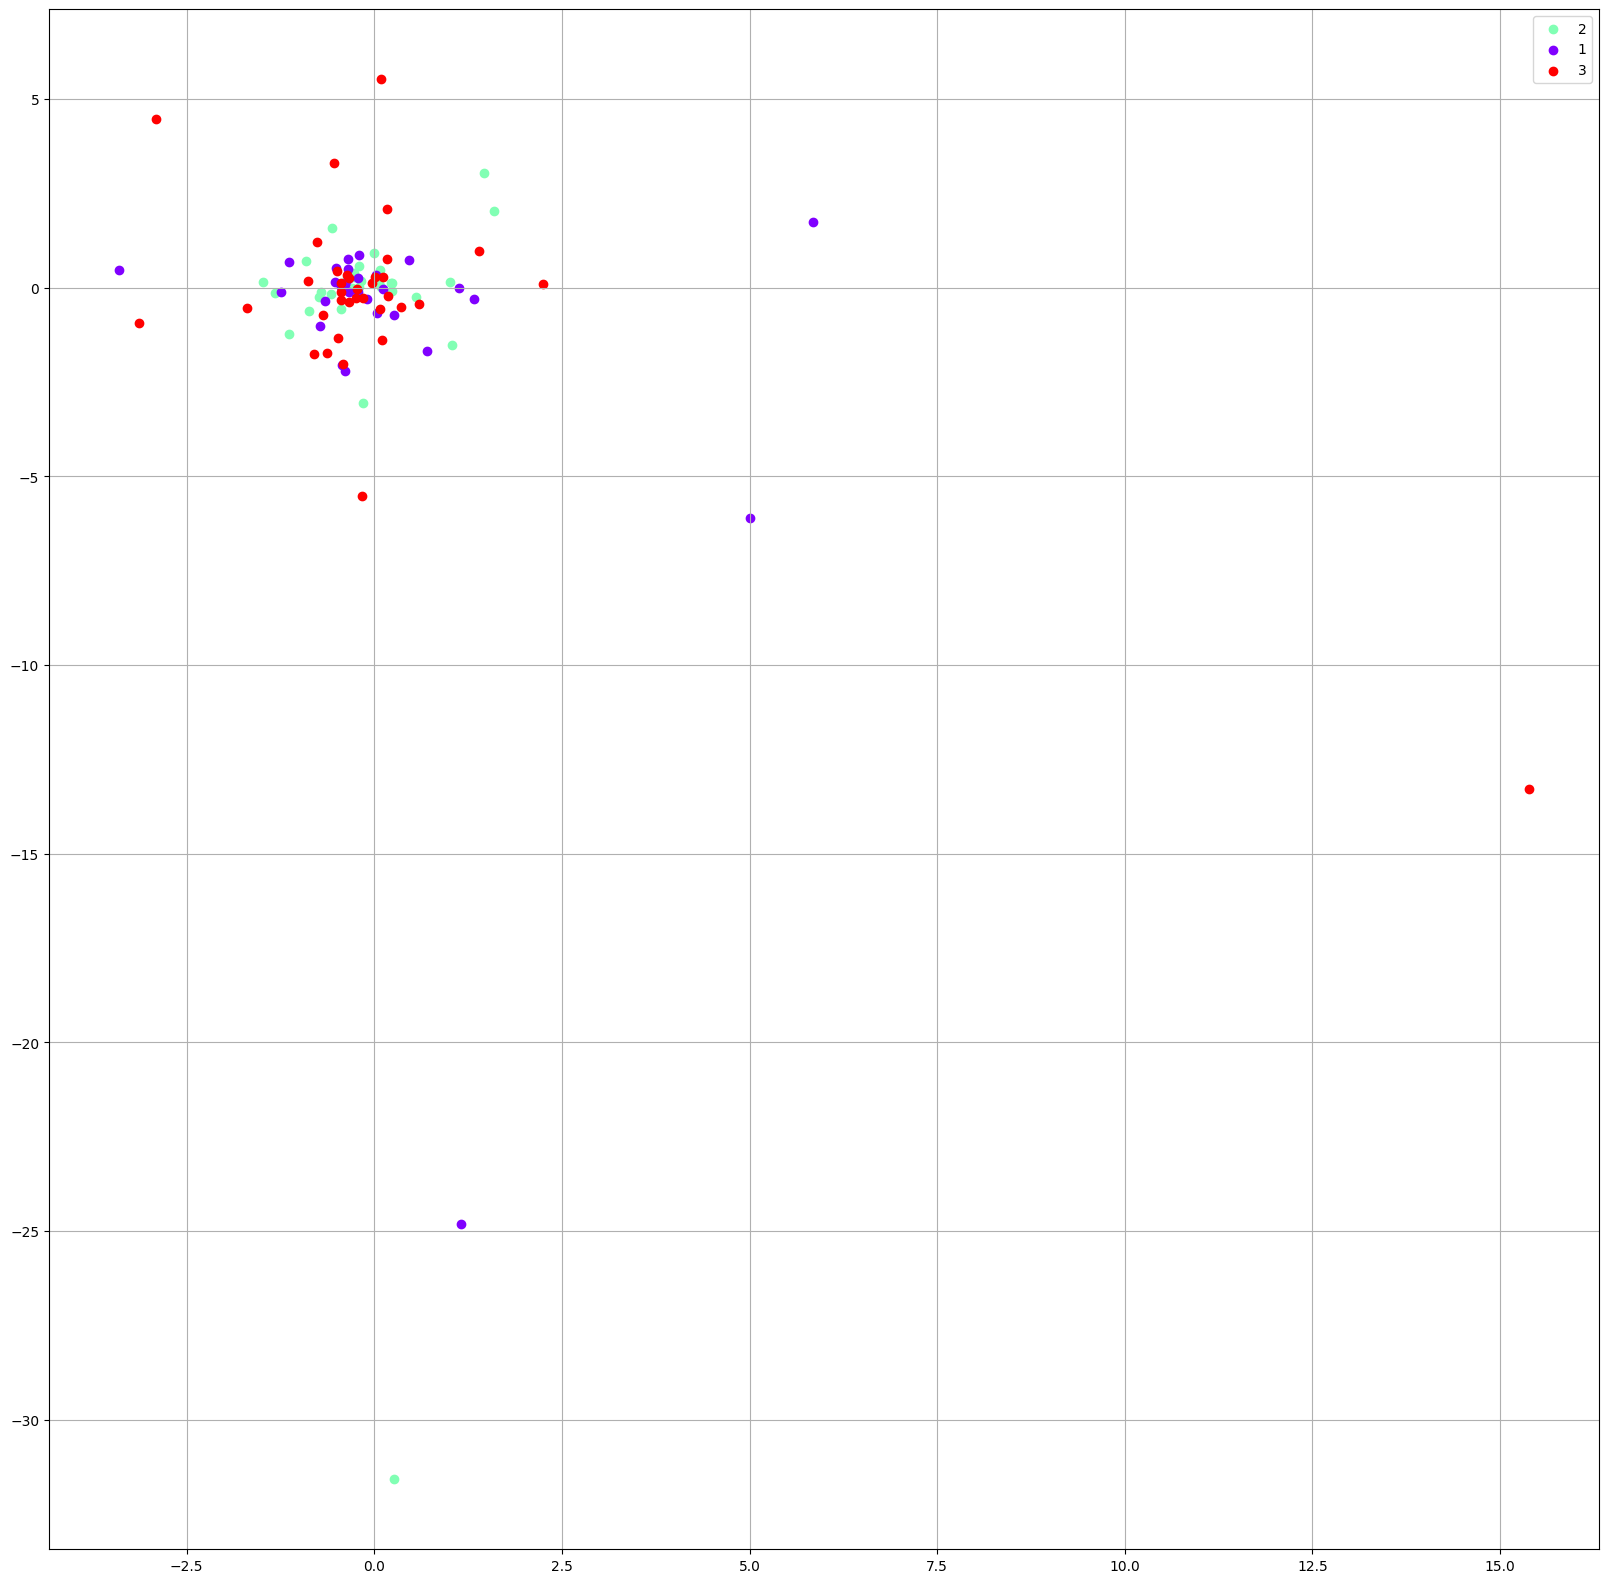

In [57]:
import mowl
mowl.init_jvm("10g")

from mowl.visualization import TSNE


tsne = TSNE(name_to_embedding, name_to_label)
tsne.generate_points(250, workers=4)
tsne.show()

# Paper Cases:

- [DL2Vec](https://colab.research.google.com/drive/1ooq6lzfWOtJIXJrsQvufN9qDh0qqi6AK): This example corresponds to the paper Predicting candidate genes from phenotypes, functions and anatomical site of expression.

- [Onto2Vec](https://colab.research.google.com/drive/14BM7u1UAfhGViv60VjAkBMxd6Whar13G): This example corresponds to the paper Onto2Vec: joint vector-based representation of biological entities and their ontology-based annotations.

- [OPA2Vec](https://colab.research.google.com/drive/1srWtQx2HIZw51DvbNlS-sLTiitfGXorA): This example corresponds to the paper OPA2Vec: combining formal and informal content of biomedical ontologies to improve similarity-based prediction.

- [DeepGOZero](https://colab.research.google.com/drive/1k-ptBZ2Mr0O9vA5hRjdc2RlnebKHNfCj): This example corresponds to the paper DeepGOZero: improving protein function prediction from sequence and zero-shot learning based on ontology axioms.

# Addtitional:

To transform a triples from a .tsv file into a .owl, we can do using the
create_from_triples method.

In [ ]:
from mowl.ontology.create import create_from_triples

triples_file = "my_triples_file.tsv"
out_file = "my_new_ontology.owl"

create_from_triples(triples_file, out_file)

In case we have a simpler triples file like the following:

In [ ]:
from mowl.ontology.create import create_from_triples

triples_file = "simpler_triples_file.tsv"
out_file = "my_new_ontology.owl"
prefix = "http://mowl/"
relation = "http://mowl/relation"

create_from_triples(triples_file,
                    out_file,
                    relation_name = relation,
                    bidirectional = True,
                    head_prefix=prefix,
                    tail_prefix=prefix)

In the context of the MOWL library, an ontology normalizer is a component used to transform an ontology into a normalized form, typically with respect to a specific description logic (DL).

The ELNormalizer class is responsible for transforming the ontology to a normalized form suitable for the EL profile. In particular, it identifies General Concept Inclusions (GCIs) in the ontology and applies normalization techniques to ensure that the ontology conforms to the EL profile.

The normalize method is then called on the normalizer object, passing the ontology as an argument. This method returns a list of normalized GCIs (General Concept Inclusions) based on the EL profile.

The ELNormalizer in MOWL is used to ensure that the ontology conforms to certain restrictions and constraints imposed by a specific Description Logic profile, in this case, the EL profile. This normalization process ensures that reasoning algorithms can efficiently operate on the ontology while preserving its semantics.

## Data preprocessing

### Load data

In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph, Namespace

# Load the ADO ontology
g = Graph()
g.parse("R-HSA-9748784_level3.owl", format="xml")  # Replace "path_to_doid.owl" with the actual path to your DOID ontology file

# Define namespaces
DO = Namespace("http://www.biopax.org/release/biopax-level3.owl#")  # Replace the namespace URI with the actual namespace URI in your ontology

# Save ontology triples to a file
triples_file = "ontology_triples.txt"
with open(triples_file, "w") as f:
    for subj, pred, obj in g:
        f.write(f"{subj}\t{pred}\t{obj}\n")

print("Ontology triples saved to", triples_file)

Ontology triples saved to ontology_triples.txt


In [ ]:
import json

# Execute SPARQL query
query = """
    SELECT ?gene ?disease
    WHERE {
        ?gene ?pred ?disease .
    }
"""
results = g.query(query)

# Process query results
interactions = {}
data = []
for row in results:
    gene = row['gene']
    disease = row['disease']
    # Update interactions dictionary
    if gene not in interactions:
        interactions[gene] = set()
    interactions[gene].add(disease)
    # Append data
    data.append((gene, disease))

# Save gene-disease associations to a file
associations_file = "gene_disease_associations.json"
with open(associations_file, "w") as f:
    json.dump(data, f, indent=4)
    #for gene, disease in data:
     #   f.write(f"{gene}\t{disease}\n")

print("Gene-disease associations saved to", associations_file)

Gene-disease associations saved to gene_disease_associations.json


### Split training, validation and testing data


In [ ]:
import numpy as np
import math

np.random.seed(seed=0) # Fix random seed for reproducibility
np.random.shuffle(data)
train_n = int(math.ceil(len(data) * 0.8))
valid_n = int(math.ceil(train_n * 0.8))
train_data = data[:valid_n]
valid_data = data[valid_n:train_n]
test_data = data[train_n:]
print('Number of training interactions:', len(train_data))
print('Number of validation interactions:', len(valid_data))
print('Number of testing interactions:', len(test_data))

Number of training interactions: 15376
Number of validation interactions: 3844
Number of testing interactions: 4805


### Save the data

In [ ]:
def save(filename, data):
    with open(filename, 'w') as f:
        for p1, p2 in data:
            f.write(f'{p1}\t{p2}\n')
            f.write(f'{p2}\t{p1}\n')

save(f'train.txt', train_data)
save(f'valid.txt', valid_data)
save(f'test.txt', test_data)

In [ ]:
#save as json
import json

def save(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

save('train.json', train_data)
save('valid.json', valid_data)
save('test.json', test_data)


### Generate negative interactions

In [ ]:
import random
proteins =set ()
negatives = []
for (p1,p2) in data:
        proteins.add(p1)
        proteins.add(p2)
while len(negatives)<len(data):
        s = random.sample(proteins, 2)
        prot1= s[0]
        prot2= s[1]
        if (prot1,prot2) in negatives or (prot2,prot1) in negatives :
                 continue
       #if prot1 not in interactions[prot2]:
        negatives.append((prot1, prot2))
print('Total number of negative interactions:', len(negatives))
# Split negative data
neg_train_data = negatives[:valid_n]
neg_valid_data = negatives[valid_n:train_n]
neg_test_data = negatives[train_n:]
print('Number of negative training interactions:', len(neg_train_data))
print('Number of negative validation interactions:', len(neg_valid_data))
print('Number of negative testing interactions:', len(neg_test_data))
# Save negative data
save(f'train_negative_interactions.txt', neg_train_data)
save(f'valid_negative_interactions.txt', neg_valid_data)
save(f'test_negative_interactions.txt', neg_test_data)

<ipython-input-8-8586fa68e8ee>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  s = random.sample(proteins, 2)


Total number of negative interactions: 40863
Number of negative training interactions: 26153
Number of negative validation interactions: 6538
Number of negative testing interactions: 8172


In [ ]:
#for drug disease and json
import random

# Extract drugs and diseases from the data
drugs = set()
diseases = set()
for drug, disease in data:
    drugs.add(drug)
    diseases.add(disease)

# Generate negative interactions between drugs and diseases
negatives = []
while len(negatives) < len(data):
    drug = random.sample(drugs, 1)[0]
    disease = random.sample(diseases, 1)[0]
    if (drug, disease) in data or (disease, drug) in data:
        continue
    negatives.append((drug, disease))

print('Total number of negative interactions:', len(negatives))

# Split negative data
neg_train_data = negatives[:valid_n]
neg_valid_data = negatives[valid_n:train_n]
neg_test_data = negatives[train_n:]

print('Number of negative training interactions:', len(neg_train_data))
print('Number of negative validation interactions:', len(neg_valid_data))
print('Number of negative testing interactions:', len(neg_test_data))

# Save negative data
save('train_negative_interactions.json', neg_train_data)
save('valid_negative_interactions.json', neg_valid_data)
save('test_negative_interactions.json', neg_test_data)


<ipython-input-8-ba0e0cb92d19>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  drug = random.sample(drugs, 1)[0]
<ipython-input-8-ba0e0cb92d19>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  disease = random.sample(diseases, 1)[0]


Total number of negative interactions: 24025
Number of negative training interactions: 15376
Number of negative validation interactions: 3844
Number of negative testing interactions: 4805


## Ontologies and text mining

Learn how text embeddings can be generated and used to facilitate learning from text.



In [ ]:
!pip install --upgrade Cython
!pip install gensim==4.0.0
!pip install scikit-learn
import matplotlib.pyplot as plt
from google.colab import drive
import gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


We create a dictionary for our ADO ontology

In [ ]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077439 sha256=58a3df9e3098bf97f4edf8588b1ab87ed85bf103a04820a836f72d1edb969cc6
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [ ]:
from owlready2 import *

# Load the ontology
onto = get_ontology("R-HSA-9748784_level3.owl").load()

# Initialize dictionary
ontology_dict = {}

# Extract classes
for cls in onto.classes():
    # Extract class information (e.g., label, subclasses, individuals)
    class_info = {
        "label": cls.label.first(),
        "subclasses": [subclass.label.first() for subclass in cls.subclasses()],
        "individuals": [individual.label.first() for individual in cls.instances()]
    }
    # Add class information to dictionary
    ontology_dict[cls.name] = class_info

# Extract object properties
for prop in onto.object_properties():
    # Extract property information (e.g., label, domain, range)
    prop_info = {
        "label": prop.label.first(),
        "domain": [domain.label.first() for domain in prop.domain],
        "range": [range.label.first() for range in prop.range]
    }
    # Add property information to dictionary
    ontology_dict[prop.name] = prop_info

# Extract data properties (similar to object properties)

# Print or save the ontology dictionary
print(ontology_dict)


{}


In [ ]:
import json

# Save the drug ADME ontology dictionary to a JSON file
ontology_dict_file = "drug_adme_ontology.json"
with open(ontology_dict_file, "w") as f:
    json.dump(drug_adme_ontology_dict, f, indent=4)

print("Drug ADME ontology dictionary saved to", ontology_dict_file)


Let us look at the following text:

In [ ]:
text="John, a middle-aged man, began experiencing unusual changes in his behavior. He became forgetful, often forgetting important appointments and tasks. His family noticed that he struggled with reasoning and frequently had difficulty expressing himself clearly. Additionally, John seemed to have trouble recognizing familiar faces, including those of his own family members. Concerned about these cognitive symptoms, John's family decided to seek medical advice."

Using a dictionary, let us first split the text into words. We do that by using the space as a delimiter. We next look up each word in our dictionary.


In [ ]:
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)
for i,token in enumerate(tokens):
  if token in ontology_dict:
    print('Identified mention of a class: ',token, 'which is the',i+1,'th token, is an instance of:', ontology_dict[token])

The splitted text looks as follows:  ['John,', 'a', 'middle-aged', 'man,', 'began', 'experiencing', 'unusual', 'changes', 'in', 'his', 'behavior.', 'He', 'became', 'forgetful,', 'often', 'forgetting', 'important', 'appointments', 'and', 'tasks.', 'His', 'family', 'noticed', 'that', 'he', 'struggled', 'with', 'reasoning', 'and', 'frequently', 'had', 'difficulty', 'expressing', 'himself', 'clearly.', 'Additionally,', 'John', 'seemed', 'to', 'have', 'trouble', 'recognizing', 'familiar', 'faces,', 'including', 'those', 'of', 'his', 'own', 'family', 'members.', 'Concerned', 'about', 'these', 'cognitive', 'symptoms,', "John's", 'family', 'decided', 'to', 'seek', 'medical', 'advice.']


In [ ]:
# Define text
text = "John, a middle-aged man, began experiencing unusual changes in his behavior. He became forgetful, often forgetting important appointments and tasks. His family noticed that he struggled with reasoning and frequently had difficulty expressing himself clearly. Additionally, John seemed to have trouble recognizing familiar faces, including those of his own family members. Concerned about these cognitive symptoms, John's family decided to seek medical advice."

# Split text into tokens
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)

# Initialize list to store identified mentions
identified_mentions = []

# Look up each word in the ontology dictionary
for token in tokens:
    # Remove punctuation marks
    token = token.strip(',.').lower()  # Convert to lowercase and remove punctuation
    if token in ontology_dict:
        identified_mentions.append((token, ontology_dict[token]))

# Print identified mentions
for i, (token, info) in enumerate(identified_mentions):
    print(f"Mention {i+1}: '{token}' is an instance of {info['label']} with subclasses {info['subclasses']} and individuals {info['individuals']}")


The splitted text looks as follows:  ['John,', 'a', 'middle-aged', 'man,', 'began', 'experiencing', 'unusual', 'changes', 'in', 'his', 'behavior.', 'He', 'became', 'forgetful,', 'often', 'forgetting', 'important', 'appointments', 'and', 'tasks.', 'His', 'family', 'noticed', 'that', 'he', 'struggled', 'with', 'reasoning', 'and', 'frequently', 'had', 'difficulty', 'expressing', 'himself', 'clearly.', 'Additionally,', 'John', 'seemed', 'to', 'have', 'trouble', 'recognizing', 'familiar', 'faces,', 'including', 'those', 'of', 'his', 'own', 'family', 'members.', 'Concerned', 'about', 'these', 'cognitive', 'symptoms,', "John's", 'family', 'decided', 'to', 'seek', 'medical', 'advice.']


We can visualize the embeddings of the ontology classes that we have:




In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import string

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Read the text corpus from the .txt file and tokenize it
corpus_file_path = 'corpus.txt'  # Replace 'your_corpus.txt' with the path to your .txt file
with open(corpus_file_path, 'r', encoding='utf-8') as file:
    # Iterate over each line in the file and tokenize it
    tokenized_corpus = [word_tokenize(preprocess_text(line)) for line in file]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
model.save("word2vec_model.bin")
